<h1 align="center">MNIST Dataset Exploration</h1>

# 1. Introduction

This notebook explores the MNIST dataset, a classic dataset of handwritten digits that is commonly used for image classification tasks. We'll look at the dataset properties, visualize examples, and prepare the data for neural network training.

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), split into 60,000 training images and 10,000 test images. Each image is 28x28 pixels.

# 2. Setting Up

First, let's set up our environment by importing the necessary libraries and loading the MNIST dataset.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Set up matplotlib for better visualizations
plt.style.use('ggplot')  # Using a style that is available in current matplotlib
# Or alternatively:
# sns.set_theme(style="whitegrid")  # Using seaborn's styling directly
plt.rcParams['figure.figsize'] = (12, 8)

# 3. Loading the MNIST Dataset

We'll use TensorFlow/Keras to download and load the MNIST dataset. This dataset is split into training and testing sets.

In [3]:
# Download and load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


# 4. Exploring the Dataset

Let's examine the dataset in more detail to understand its properties and characteristics.

## 4.1. Data Structure

The MNIST images are 28x28 grayscale images, with pixel values ranging from 0 to 255. Let's look at the data types and value ranges.

In [4]:
# Check data types and value ranges
print(f"Data type: {X_train.dtype}")
print(f"Min pixel value: {X_train.min()}")
print(f"Max pixel value: {X_train.max()}")

Data type: uint8
Min pixel value: 0
Max pixel value: 255


## 4.2. Class Distribution

The dataset contains 10 classes (digits 0-9). Let's examine the distribution of these classes in both the training and test sets to ensure they're balanced.

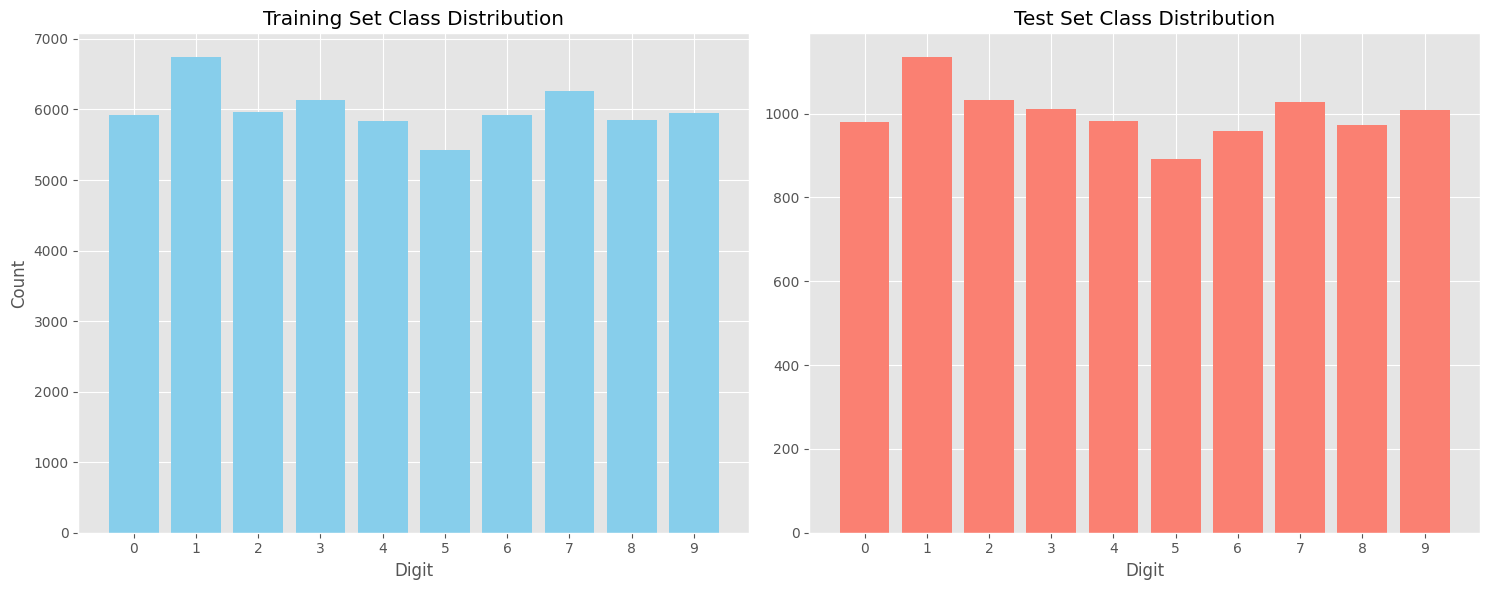

Training set distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples

Test set distribution:
Digit 0: 980 samples
Digit 1: 1135 samples
Digit 2: 1032 samples
Digit 3: 1010 samples
Digit 4: 982 samples
Digit 5: 892 samples
Digit 6: 958 samples
Digit 7: 1028 samples
Digit 8: 974 samples
Digit 9: 1009 samples


In [5]:
# Count and plot the distribution of digits in the training set
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set distribution
ax1.bar(unique_train, counts_train, color='skyblue')
ax1.set_title('Training Set Class Distribution')
ax1.set_xlabel('Digit')
ax1.set_ylabel('Count')
ax1.set_xticks(range(10))

# Test set distribution
ax2.bar(unique_test, counts_test, color='salmon')
ax2.set_title('Test Set Class Distribution')
ax2.set_xlabel('Digit')
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()

# Print the exact counts
print("Training set distribution:")
for digit, count in zip(unique_train, counts_train):
    print(f"Digit {digit}: {count} samples")

print("\nTest set distribution:")
for digit, count in zip(unique_test, counts_test):
    print(f"Digit {digit}: {count} samples")

## 4.3. Visualizing Sample Images

Let's visualize some sample images from the dataset to get a better understanding of what we're working with.

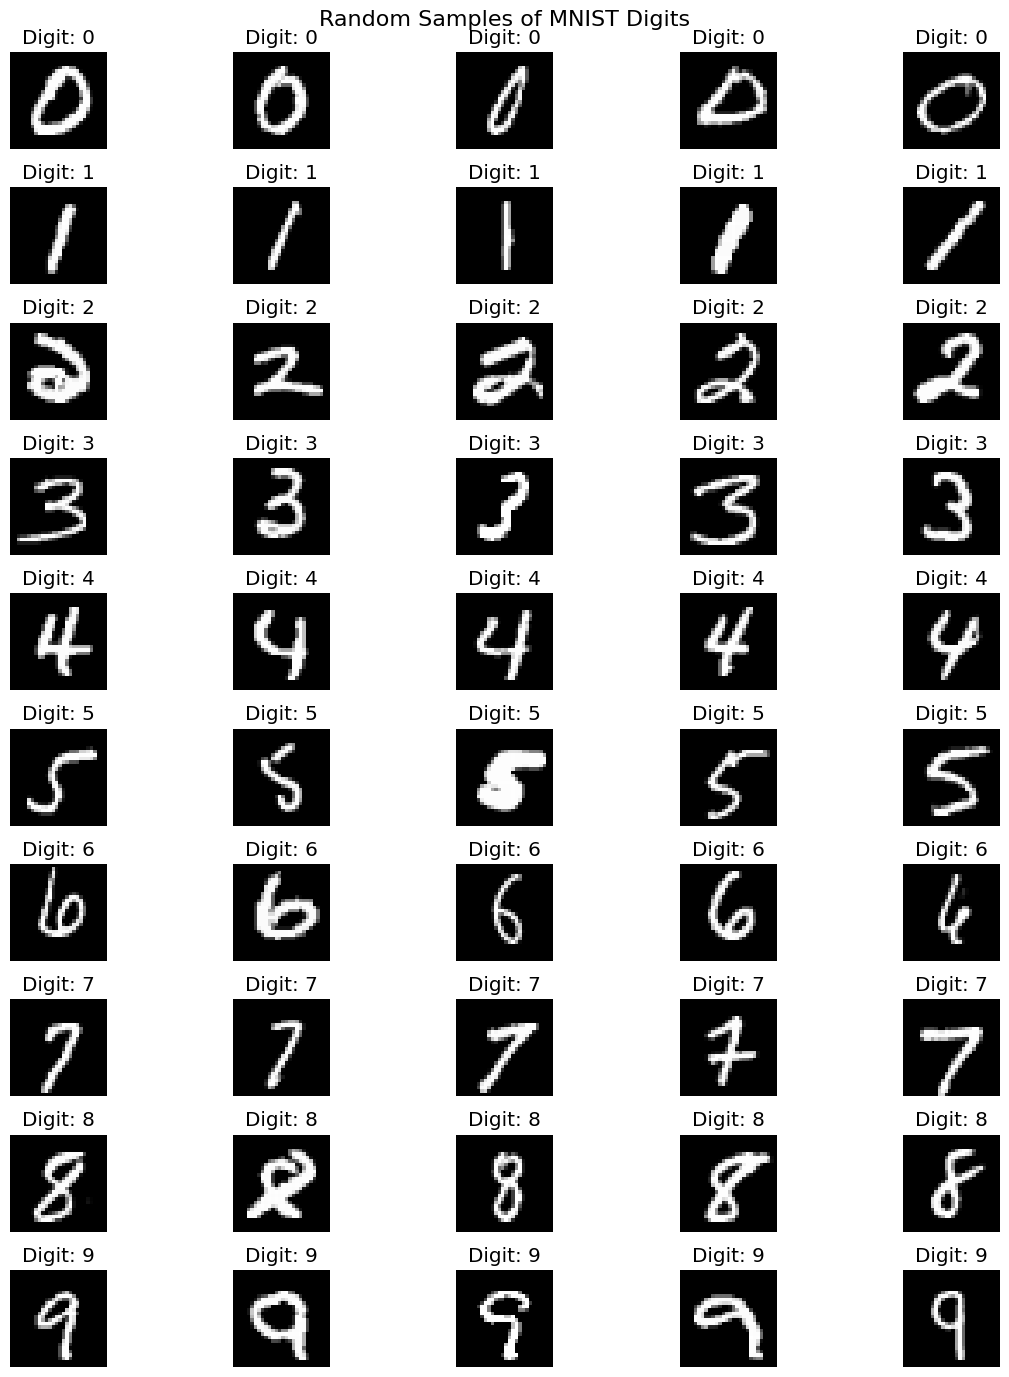

In [6]:
# Function to display random samples
def display_digit_samples(X, y, samples_per_digit=5):
    """Display random samples of each digit."""
    fig, axes = plt.subplots(10, samples_per_digit, figsize=(12, 14))
    fig.suptitle('Random Samples of MNIST Digits', fontsize=16)
    
    for digit in range(10):
        # Find all images of this digit
        digit_indices = np.where(y == digit)[0]
        
        # Select random images of this digit
        selected_indices = np.random.choice(digit_indices, samples_per_digit, replace=False)
        
        for i, idx in enumerate(selected_indices):
            ax = axes[digit, i]
            ax.imshow(X[idx], cmap='gray')
            ax.set_title(f"Digit: {digit}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Display 5 random samples of each digit
display_digit_samples(X_train, y_train)

## 4.4. Pixel Intensity Distribution

Let's examine the distribution of pixel intensities across the dataset.

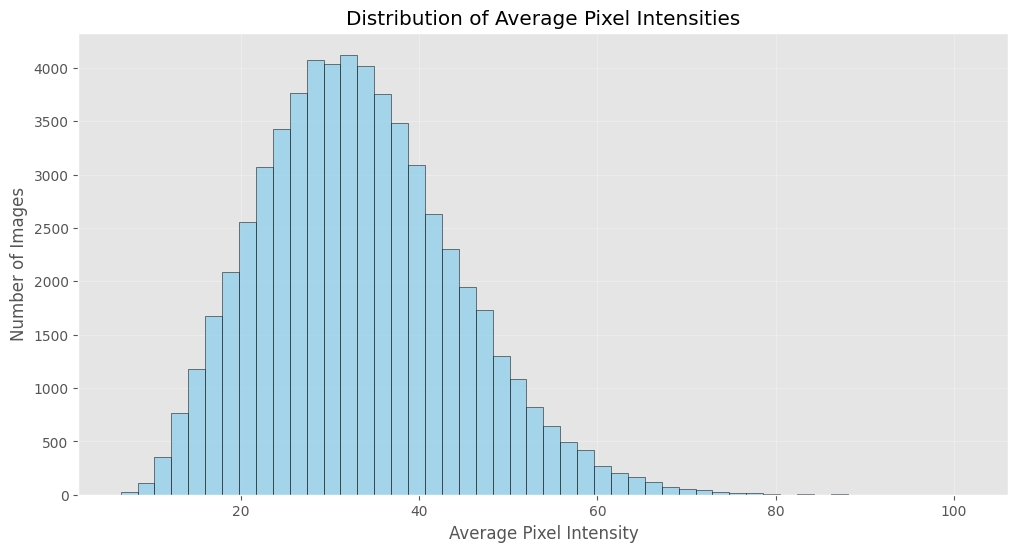

Mean pixel intensity: 33.32
Median pixel intensity: 0.00
Standard deviation of pixel intensities: 78.57


In [7]:
# Plot the distribution of pixel intensities
plt.figure(figsize=(12, 6))

# Calculate the average pixel intensity for each image
avg_pixel_intensity = np.mean(X_train, axis=(1, 2))

plt.hist(avg_pixel_intensity, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Pixel Intensities')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Number of Images')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate statistics
print(f"Mean pixel intensity: {np.mean(X_train):.2f}")
print(f"Median pixel intensity: {np.median(X_train):.2f}")
print(f"Standard deviation of pixel intensities: {np.std(X_train):.2f}")

## 4.5. Pixel Intensity Heatmap

Let's create a heatmap showing the average pixel intensity across all training images. This will help us understand which parts of the images are most commonly used for writing digits.

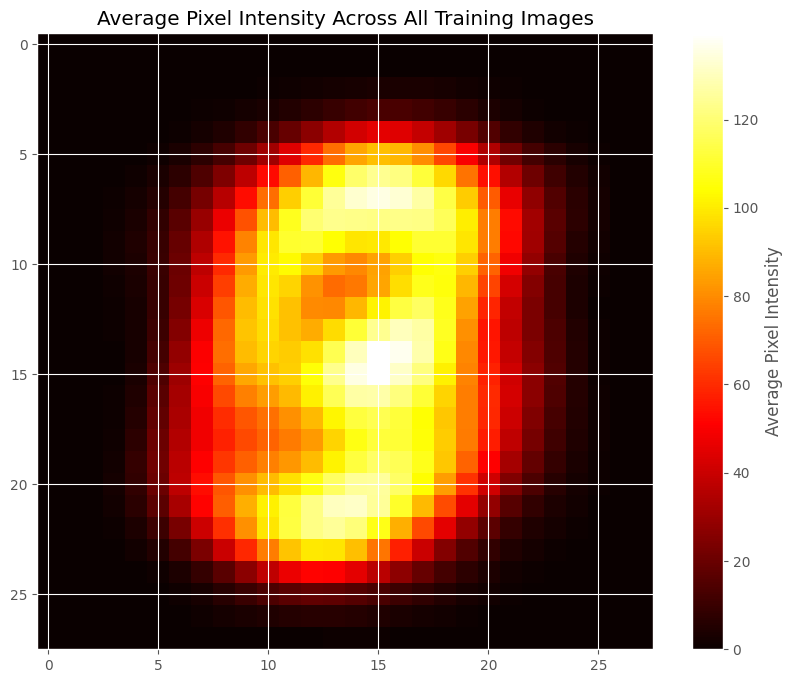

In [8]:
# Calculate the average image across all training samples
avg_image = np.mean(X_train, axis=0)

plt.figure(figsize=(10, 8))
plt.imshow(avg_image, cmap='hot')
plt.colorbar(label='Average Pixel Intensity')
plt.title('Average Pixel Intensity Across All Training Images')
plt.show()

## 4.6. Digit-Specific Analysis

Let's look at the average image for each digit to see patterns specific to each class.

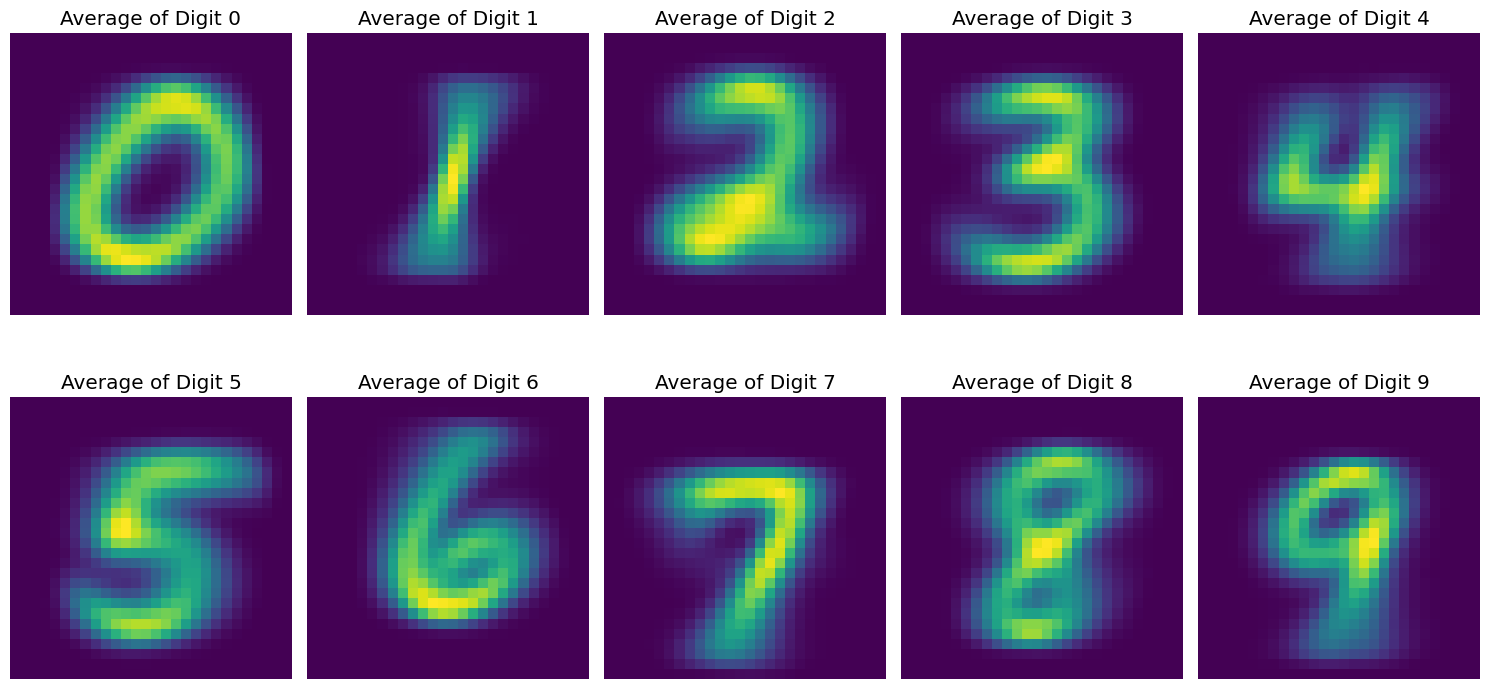

In [9]:
# Calculate average image for each digit
plt.figure(figsize=(15, 8))

for digit in range(10):
    # Find all images of this digit
    digit_indices = np.where(y_train == digit)[0]
    digit_images = X_train[digit_indices]
    
    # Calculate the average image for this digit
    avg_digit_image = np.mean(digit_images, axis=0)
    
    plt.subplot(2, 5, digit + 1)
    plt.imshow(avg_digit_image, cmap='viridis')
    plt.title(f'Average of Digit {digit}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Data Preprocessing

Before using the dataset for model training, we need to preprocess the data. This typically involves normalization and reshaping.

## 5.1. Normalization

Neural networks usually perform better when the input data is normalized. Let's normalize the pixel values to the range [0, 1].

Normalized training data - Min: 0.0, Max: 1.0
Normalized test data - Min: 0.0, Max: 1.0


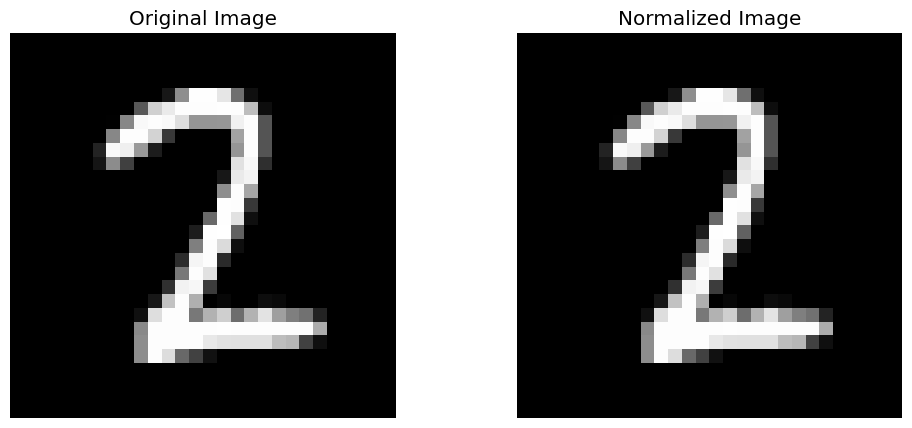

In [10]:
# Normalize pixel values to range [0, 1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Check the new data ranges
print(f"Normalized training data - Min: {X_train_norm.min()}, Max: {X_train_norm.max()}")
print(f"Normalized test data - Min: {X_test_norm.min()}, Max: {X_test_norm.max()}")

# Visualize a sample before and after normalization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sample_idx = np.random.randint(0, X_train.shape[0])
ax1.imshow(X_train[sample_idx], cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(X_train_norm[sample_idx], cmap='gray')
ax2.set_title('Normalized Image')
ax2.axis('off')

plt.show()

## 5.2. Data Reshaping

For a standard neural network (as opposed to a convolutional neural network), we need to flatten the 2D images into 1D vectors.

In [11]:
# Reshape data for the model (flattening the images)
X_train_flattened = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flattened = X_test_norm.reshape(X_test_norm.shape[0], -1)

print(f"Original training data shape: {X_train_norm.shape}")
print(f"Flattened training data shape: {X_train_flattened.shape}")
print(f"Original test data shape: {X_test_norm.shape}")
print(f"Flattened test data shape: {X_test_flattened.shape}")

Original training data shape: (60000, 28, 28)
Flattened training data shape: (60000, 784)
Original test data shape: (10000, 28, 28)
Flattened test data shape: (10000, 784)


# 6. Feature Extraction and Analysis

For demonstration purposes, let's extract some simple features from our images and analyze them.

In [12]:
# Function to extract basic features from images
def extract_features(images):
    """Extract basic statistical features from images."""
    features = []
    for img in images:
        # Calculate basic statistics
        mean_px = np.mean(img)
        std_px = np.std(img)
        max_px = np.max(img)
        min_px = np.min(img)
        
        # Calculate center of mass
        indices = np.indices(img.shape)
        y_indices, x_indices = indices[0], indices[1]
        total = np.sum(img)
        
        # Avoid division by zero
        if total == 0:
            cx, cy = img.shape[1]//2, img.shape[0]//2
        else:
            cx = np.sum(x_indices * img) / total
            cy = np.sum(y_indices * img) / total
        
        features.append({
            'mean': mean_px,
            'std': std_px,
            'max': max_px,
            'min': min_px,
            'center_x': cx,
            'center_y': cy
        })
    
    return pd.DataFrame(features)

# Extract features from a subset of the training data for demonstration
sample_indices = np.random.choice(range(X_train.shape[0]), 5000, replace=False)
X_sample = X_train_norm[sample_indices]
y_sample = y_train[sample_indices]

# Extract features
features_df = extract_features(X_sample)
features_df['digit'] = y_sample

# Display the first few rows of the features dataframe
features_df.head()

,mean,std,max,min,center_x,center_y,digit
0,0.130537,0.309237,1.0,0.0,14.134269,14.352149,9
1,0.134379,0.314160,1.0,0.0,13.805583,13.870500,9
2,0.102781,0.277474,1.0,0.0,13.746156,13.805578,7
3,0.132958,0.305733,1.0,0.0,14.472820,13.944924,8
4,0.067387,0.223758,1.0,0.0,14.127005,14.265959,4


## 6.1. Feature Correlation Analysis

Let's explore correlations between our extracted features.

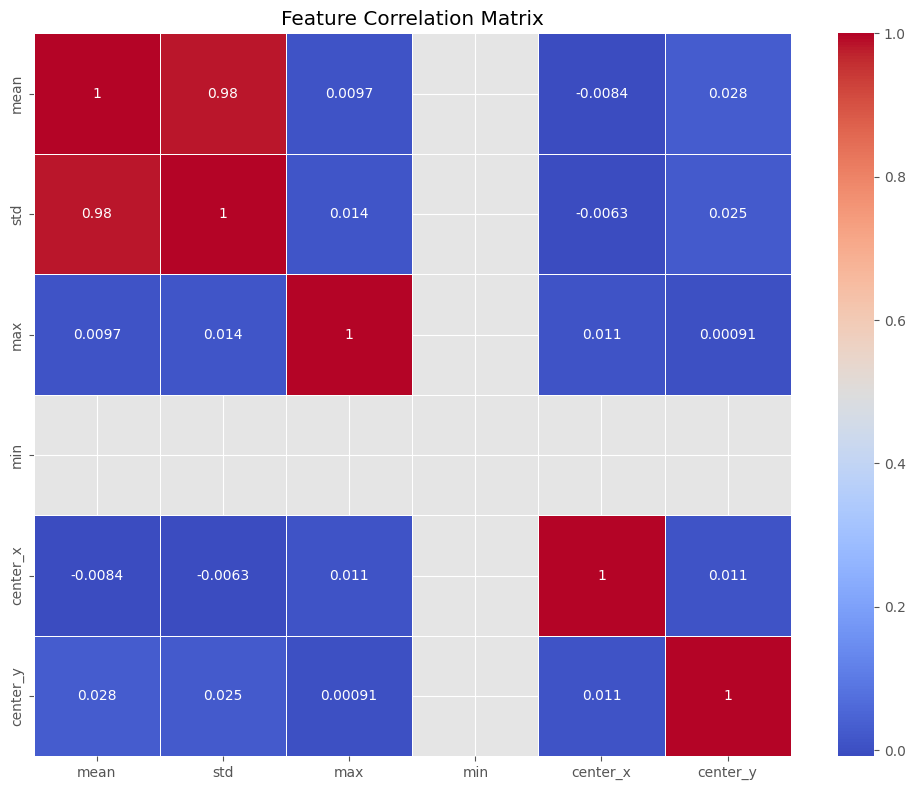

In [13]:
# Create a correlation matrix for our features
corr_matrix = features_df.drop('digit', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 6.2. Feature Distribution by Digit

Let's examine how these features vary across different digits.

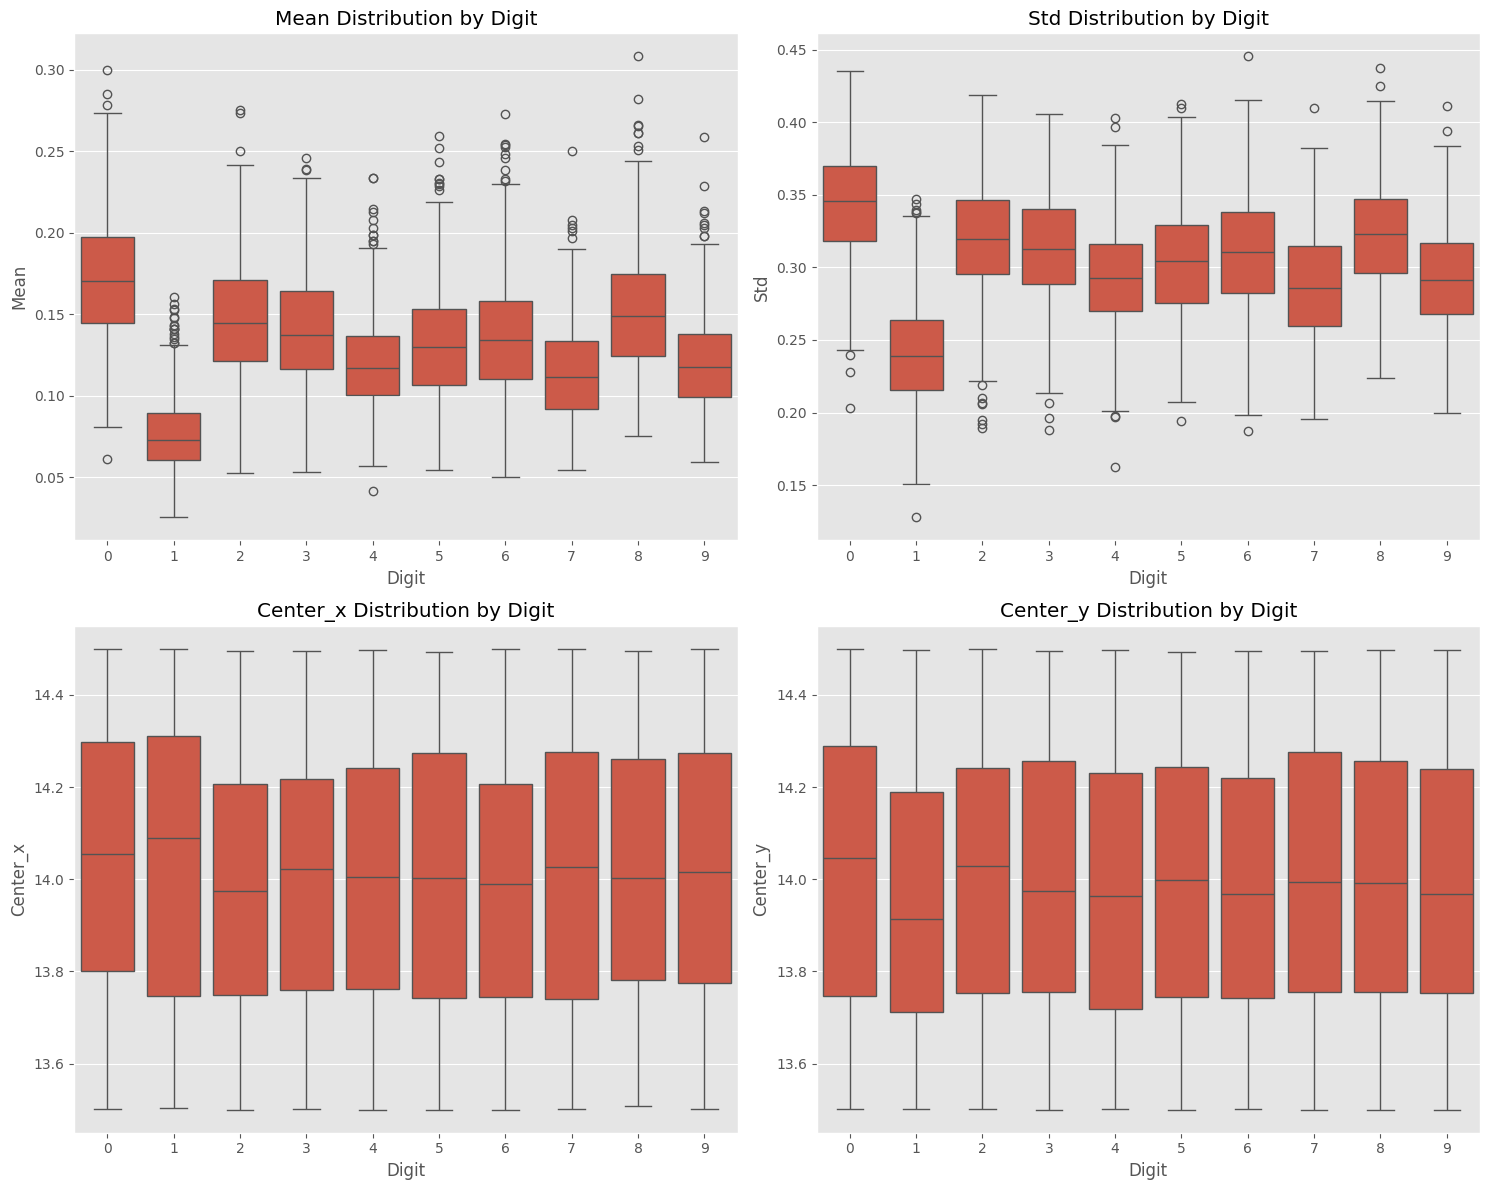

In [14]:
# Plot feature distributions by digit
feature_names = ['mean', 'std', 'center_x', 'center_y']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.boxplot(x='digit', y=feature, data=features_df, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Distribution by Digit')
    axes[i].set_xlabel('Digit')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

## 6.3. Feature Scatter Plot

Let's create scatter plots to visualize relationships between features and see if they help separate different digits.

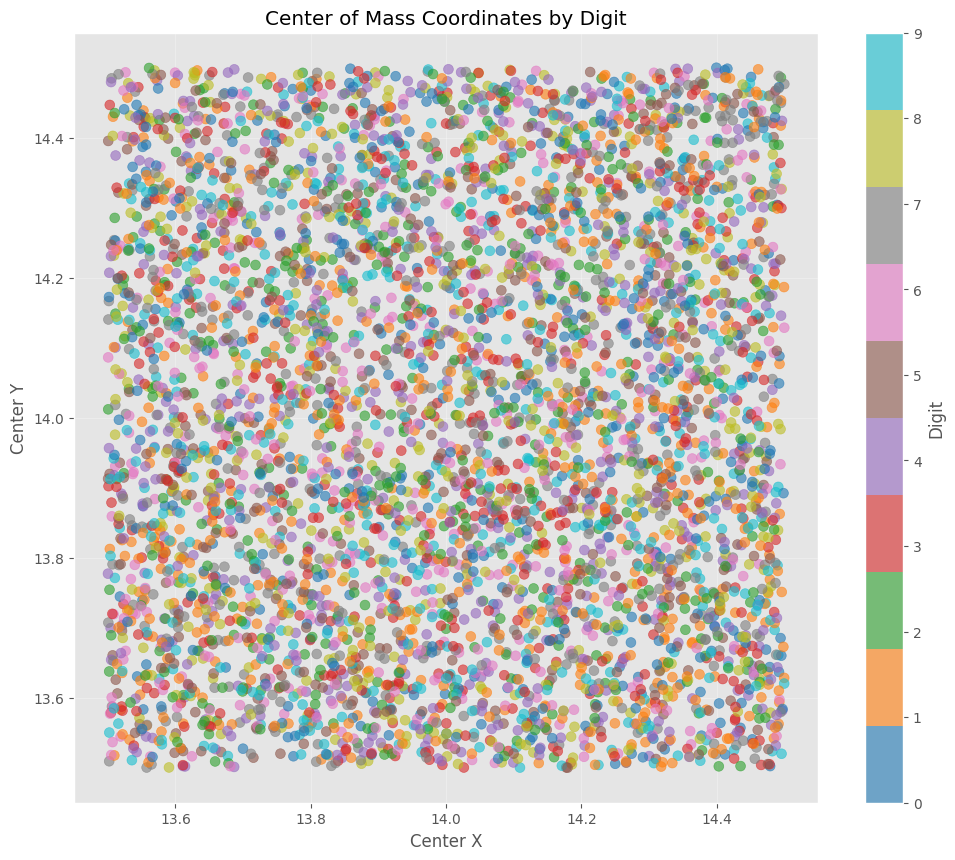

In [15]:
# Create scatter plots with different color for each digit
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    features_df['center_x'], 
    features_df['center_y'], 
    c=features_df['digit'], 
    cmap='tab10', 
    alpha=0.6, 
    s=50
)
plt.colorbar(scatter, label='Digit')
plt.title('Center of Mass Coordinates by Digit')
plt.xlabel('Center X')
plt.ylabel('Center Y')
plt.grid(True, alpha=0.3)
plt.show()

# 7. Dimensionality Reduction for Visualization

Let's apply dimensionality reduction to visualize our high-dimensional data (784 dimensions after flattening) in 2D space.

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# For demonstration, let's use a smaller subset 
sample_size = 2000
indices = np.random.choice(range(X_train_norm.shape[0]), sample_size, replace=False)
X_subset = X_train_flattened[indices]
y_subset = y_train[indices]

## 7.1. Principal Component Analysis (PCA)

PCA is a technique for dimensionality reduction that finds the directions of maximum variance in the data.

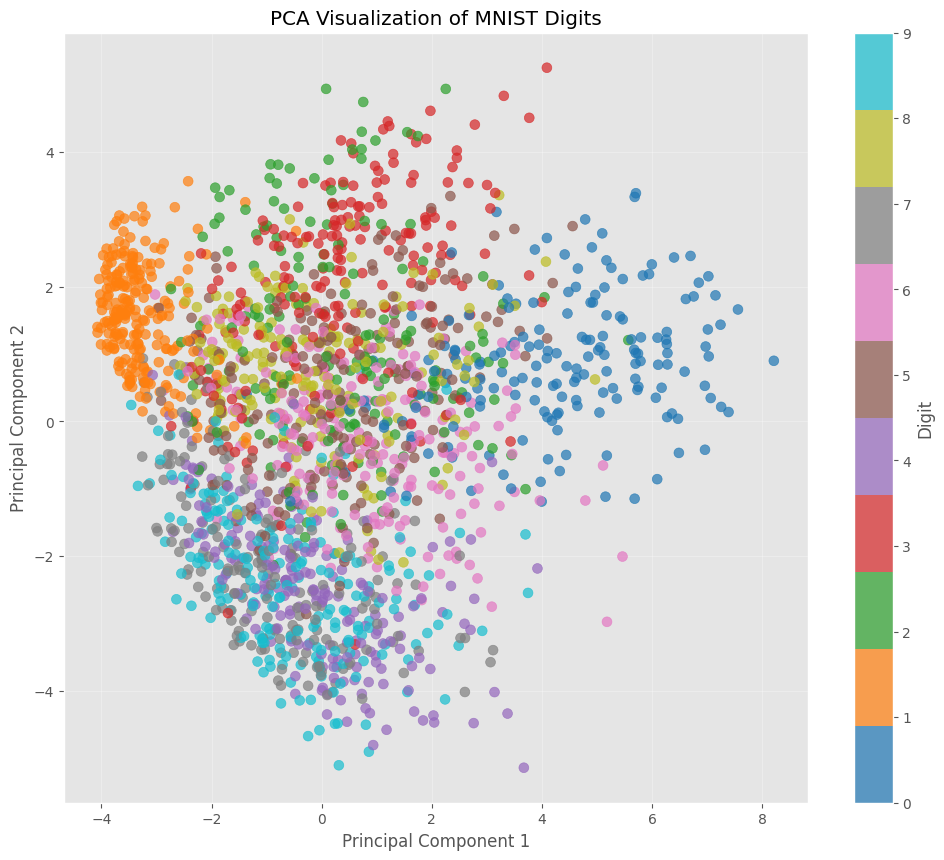

Explained variance ratio: [0.09788395 0.07371321]
Total explained variance: 0.1716


In [17]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Plot the results
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Digit')
plt.title('PCA Visualization of MNIST Digits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

# Print the explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

## 7.2. t-SNE Visualization

t-SNE is a technique for dimensionality reduction that is particularly well suited for visualizing high-dimensional data.

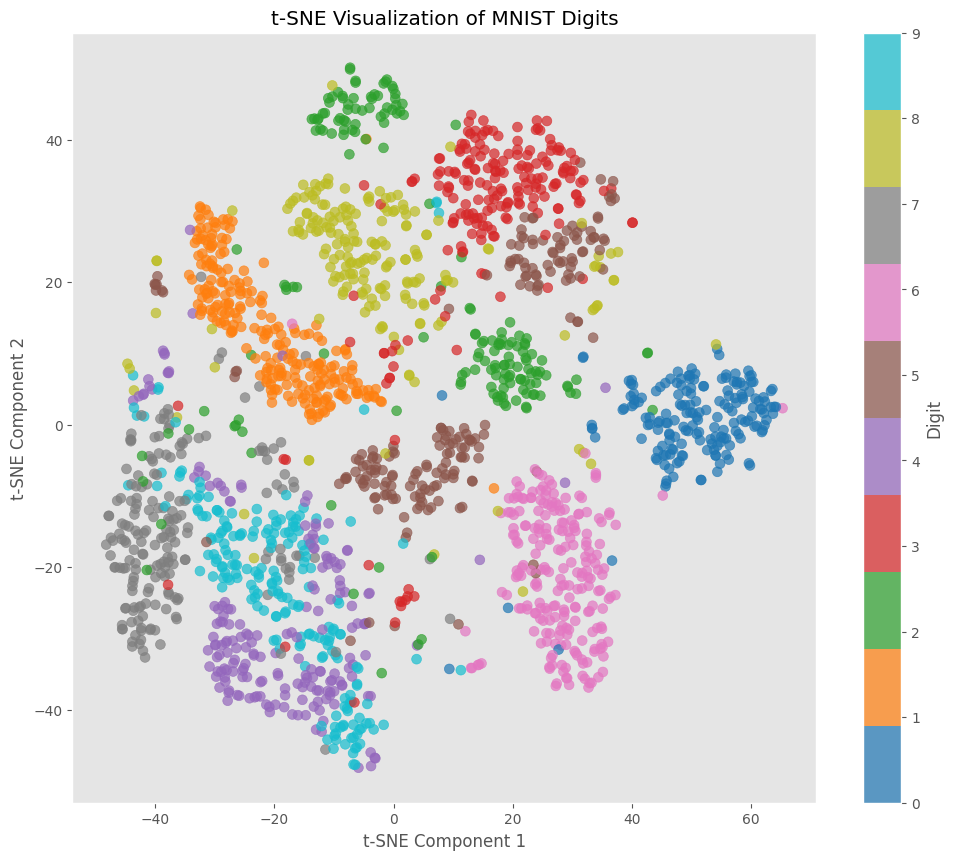

In [18]:
# Apply t-SNE (this may take a while to run)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Plot the results
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Digit')
plt.title('t-SNE Visualization of MNIST Digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(False)
plt.show()

# 8. Summary

In this notebook, we've explored the MNIST dataset of handwritten digits. We've:

1. Loaded and examined the structure of the dataset
2. Visualized sample images and class distributions
3. Analyzed pixel intensity distributions and patterns
4. Preprocessed the data through normalization and reshaping
5. Extracted and analyzed basic features
6. Visualized the high-dimensional data using dimensionality reduction techniques

This exploration has given us insights into the characteristics of the MNIST dataset, which will be valuable for building and training models for digit recognition.

The next steps would be to build, train, and evaluate machine learning models using this preprocessed data.